# Exploring a dataset

Today, you will use what you have learned about data handling and visualisation to examine the 'CO2' dataset. This data set was taken from the following paper:

>Potvin, C., Lechowicz, M. J. and Tardif, S. (1990) 'The statistical analysis of ecophysiological response curves obtained from experiments involving repeated measures', Ecology, 71, 1389–1400.

### Data Summary
The CO2 dataset comes from an experiment conducted to study how different types of grass plants absorb carbon dioxide (CO2) under various conditions. Scientists were interested in understanding how plants from two different regions, Quebec and Mississippi, respond to changes in their environment. Some of these plants were kept in a normal environment ("nonchilled"), while others were kept in cooler conditions ("chilled"). The experiment measured how much CO2 each plant could absorb when exposed to different concentrations of CO2 in the air. The goal was to see how the origin of the plants and the treatment conditions affected their ability to absorb CO2.

The file is named: https://star.herts.ac.uk/~kuhn/DHV/CO2.parquet

## Step 1: Read this file and print the columns
Recall that you can use the url when reading the file with Pandas.

In [ ]:
import numpy as np
import pandas as pd

# Your work here.




## Step 2: Plot CO<sub>2</sub> concentration versus uptake
You will make a nicer plot later on, but at this stage we are still examining the data. By plotting the independant variable (CO<sub>2</sub> concentration) versus the dependant variable (CO<sub>2</sub> uptake rate), you will get a sense of what is going on.

- The column 'conc' is the concentration CO<sub>2</sub> in the air to which the plants are exposed in units of parts per million (ppm).
- The column 'uptake' is rate at which the plants uptake CO<sub>2</sub> during photosynthesis in units of $\mu\text{mol}/m^2/s$.

In [ ]:
import matplotlib.pyplot as plt

# Your work here.



## Step 3: Create a multi-indexed Pandas table

This study used plants from two different region (Quebec and Missippi) and kept in either warmer environments (nonchilled) or colder environments (chilled). Three different types of plants were used for each region. The plants were then exposed to different concentrations of CO<sub>2</sub>.  

Create a multi-indexed table using columns 'Type' and 'Treatment' for the indices. Display this table.

In [ ]:
# Your work here.

# You can use the Pandas method 'set_index()' to convert columns into indices.



## Step 4: Pivot tables for CO<sub>2</sub> uptake

Use the Pandas groupby() syntax to calculate the mean, median, and standard deviation
CO<sub>2</sub> uptake for each 'treatment'.

From the summary table, does it seem that 'nonchilled' or 'chilled' plants uptake CO<sub>2</sub> at a faster rate?

In [ ]:
# Your work here.






## Step 5: Plotting again.

This time you will make a nicer plot, trying to visualise the results from Step 4. 

Plot data points for Missippi plants as trianges and data points for Quebec plants as squares. Plot chilled plants in blue and nonchilled plants in orange. Make the titles, axis labels, and everything else look nice. 

Considering this plot, do your results from Step 4 appear consistent?

Hint: For plotting strategies, see the 'Example plot' below.

In [ ]:
import matplotlib.pyplot as plt

# Your work here.






## Example plot: This contents of this plot are unrelated to the above exercise. This plot is just included for hints on style.

                        temperature    volume   pressure
Type  Treatment Sample                                  
Gas A low       0        383.651053  1.236428  25.474790
                1        250.720926  2.232893   9.218617
                2        330.817706  1.829470  14.845903
                3        430.778742  4.888763   7.234332
                4        288.597591  4.637674   5.108997
...                             ...       ...        ...
Gas B high      20       289.181753  1.872269  12.680777
                21       420.323924  1.035720  33.318464
                22       385.502081  4.402812   7.188524
                23       263.149774  3.145630   6.868131
                24       440.619373  3.894028   9.289828

[100 rows x 3 columns]


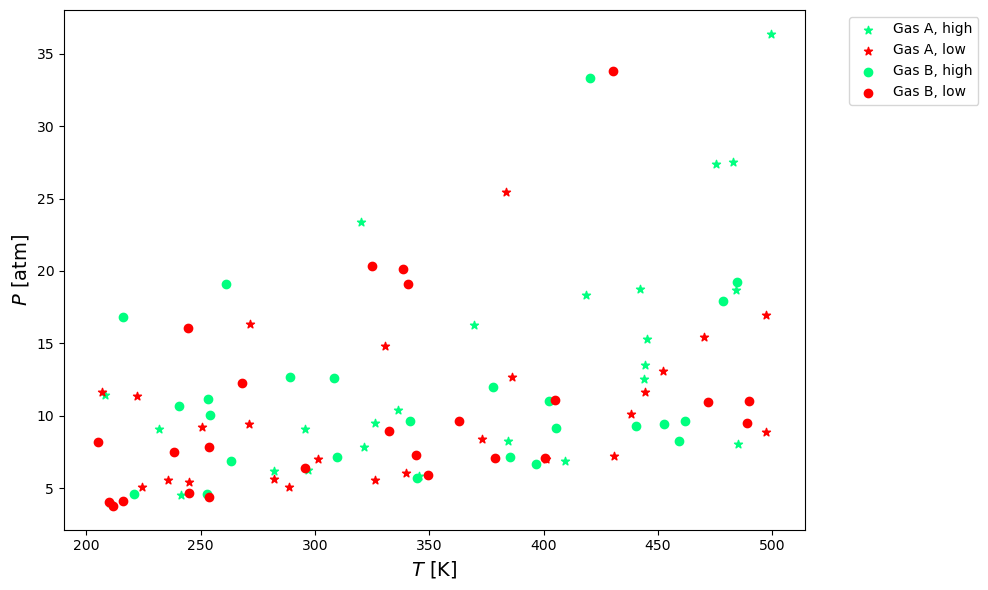

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a mock dataset for the sake of plotting
np.random.seed(111)
types = ['Gas A', 'Gas B']
treatments = ['low', 'high']
index = pd.MultiIndex.from_product([types, treatments, range(25)], names=['Type', 'Treatment', 'Sample'])
n = 1  # moles
R = 0.0821  # L·atm/(K·mol)
temperature = np.random.uniform(200, 500, size=100)  # Temperature in Kelvin
volume = np.random.uniform(1, 5, size=100)  # Volume in liters
pressure = (n * R * temperature) / volume  # Pressure in atmospheres using the Ideal Gas Law: PV = nRT

data = pd.DataFrame({'temperature': temperature, 'volume': volume, 'pressure': pressure}, index=index)
print(data)

# Plotting code

colors = {'low': 'red', 'high': 'springgreen'} # point colours
markers = {'Gas A': '*', 'Gas B': 'o'} # symbol shapes

fig, ax = plt.subplots(figsize=(10, 6))

for (type_val, treatment_val), group in data.groupby(level=['Type', 'Treatment'], observed=True):
    ax.scatter(group['temperature'], group['pressure'],
               color=colors[treatment_val],
               marker=markers[type_val],
               label=f'{type_val}, {treatment_val}')

ax.set_xlabel(r'$T~[\text{K}]$', fontsize=14)  
ax.set_ylabel(r'$P~[\text{atm}]$', fontsize=14)  

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
